## @cityyear handle -- all posts, and top favorited and retweeted posts for first 4 1/2 months of 2019


In [42]:
# @hidden_cell
import warnings
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from datetime import datetime
import re

In [43]:

allDF = pd.read_csv ("cityyear_hq_handle_twitter_april_collectionfeed.csv") 



In [44]:
allDF.columns.values

array(['rowid', 'query', 'user_type', 'tweet_id', 'inserted_date',
       'truncated', 'language', 'possibly_sensitive', 'coordinates',
       'retweeted_status', 'withheld_in_countries', 'withheld_scope',
       'created_at_text', 'created_at', 'month', 'year', 'content',
       'from_user_screen_name', 'from_user_followers_count',
       'from_user_friends_count', 'from_user_listed_count',
       'from_user_favourites_count', 'from_user_statuses_count',
       'from_user_description', 'from_user_location',
       'from_user_created_at', 'retweet_count', 'favorite_count',
       'entities_urls', 'entities_urls_count', 'entities_hashtags',
       'entities_hashtags_count', 'entities_mentions',
       'entities_mentions_count', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'source', 'entities_expanded_urls',
       'json_output', 'entities_media_count', 'media_expanded_url',
       'media_url', 'media_type', 'video_link', 'photo_link', 'twitpic',
       'num_characters', 'n

In [45]:
newDF = allDF


In [46]:

#get rid of retweets, ie leave in null retweets, then drop that column

newDF = allDF[allDF["retweeted_status"].isnull()] 


In [47]:

columns = ['query','rowid','user_type','inserted_date','truncated','language','possibly_sensitive','withheld_in_countries',
 'withheld_scope','from_user_screen_name',
 'from_user_followers_count',
 'from_user_friends_count',
 'from_user_listed_count',
 'from_user_favourites_count',
 'from_user_statuses_count',
 'from_user_description',
 'from_user_location',
 'from_user_created_at',
'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'source',
 'entities_expanded_urls',
 'json_output',
 'entities_media_count',
'entities_urls',
 'entities_urls_count',
 'entities_hashtags',
 'entities_hashtags_count',
 'entities_mentions',
 'entities_mentions_count',
 'created_at',
'num_characters',
 'num_words',
'coordinates',
'retweeted_status','media_expanded_url',
 'media_url',
 'media_type',
 'video_link',
 'photo_link',
 'twitpic','month']
newDF.drop(columns, inplace=True, axis=1)



In [48]:
list(newDF)

['tweet_id',
 'created_at_text',
 'year',
 'content',
 'retweet_count',
 'favorite_count']

## grab 2019

In [49]:

newDF = newDF[(newDF['year'] == 2019)]


## All the content in this time period -- 93 tweets -- also see excel spreadsheet

In [50]:
newDF.shape

(93, 6)

In [51]:
print(newDF["content"])

249    So, you‚Äôve done it! You‚Äôve decided to serv...
250    Math, science, engineering and technology are ...
251    Orlando is a city ripe with fun activities for...
252    Your year of service will shine on your resume...
253    Serving in the City of Angels can be difficult...
254    Be prepared to submit your application to @Cit...
255    Check out 10 incredible things City Year Provi...
256    Here are some inside tips if you are consideri...
257    Are you looking for purpose and challenge? Che...
258    @CityYearColaSC @SenatorTimScott @AmeriCorpsSC...
259    @DorisMatsui @AmeriCorps Thank you for being a...
260    We thank you for your support, Senator Rubio! ...
261    You are a true friend to City Year and we appr...
262    Thank you for your continued support! https://...
263    From Little Rock to New York City. Get all the...
264    Kansas City might be the city for you! Check o...
265    Today, our staff and our supporters are meetin...
269    Great to see one of @Cit

In [52]:
del newDF['year']

## Rank  by most retweeted

In [53]:
mostRetweets = newDF.sort_values(by="retweet_count",ascending=False)
mostRetweets.head(50)

,tweet_id,created_at_text,content,retweet_count,favorite_count
285,1.110000e+18,Wed Mar 13 17:50:49 +0000 2019,The White House has proposed a budget that wou...,39,46
359,1.090000e+18,Tue Jan 22 20:16:53 +0000 2019,Today we mourn the loss of national service's ...,20,49
284,1.110000e+18,Wed Mar 13 18:55:23 +0000 2019,"Our alumni network is now over 30,000 members ...",15,26
372,1.090000e+18,Wed Jan 16 22:03:06 +0000 2019,Maggie Chang is a @CityYearnewyork alum and a ...,12,22
304,1.100000e+18,Thu Feb 21 18:45:00 +0000 2019,We are so proud of Alex Peay and Mubarak Lawre...,8,24
356,1.090000e+18,Wed Jan 23 22:58:09 +0000 2019,"Today, @BofA_News announced that they would be...",8,23
322,1.100000e+18,Wed Feb 13 00:39:37 +0000 2019,Clap it up for @Chiefs president @MDChiefs as ...,7,43
371,1.090000e+18,Mon Jan 21 17:44:01 +0000 2019,"On this very special #MLKDay, we look to conti...",6,14
265,1.120000e+18,Wed Apr 10 19:37:10 +0000 2019,"Today, our staff and our supporters are meetin...",6,18
308,1.100000e+18,Wed Feb 13 19:49:24 +0000 2019,.@cityyearbuffalo is the newest City Year site...,5,9


## Rank by most favorited

In [54]:
mostFavorite = newDF.sort_values(by="favorite_count",ascending=False)
mostFavorite.head(50)


,tweet_id,created_at_text,content,retweet_count,favorite_count
359,1.090000e+18,Tue Jan 22 20:16:53 +0000 2019,Today we mourn the loss of national service's ...,20,49
285,1.110000e+18,Wed Mar 13 17:50:49 +0000 2019,The White House has proposed a budget that wou...,39,46
322,1.100000e+18,Wed Feb 13 00:39:37 +0000 2019,Clap it up for @Chiefs president @MDChiefs as ...,7,43
352,1.090000e+18,Fri Jan 25 15:10:43 +0000 2019,Our first ever Manchester to Manchester call! ...,5,40
284,1.110000e+18,Wed Mar 13 18:55:23 +0000 2019,"Our alumni network is now over 30,000 members ...",15,26
304,1.100000e+18,Thu Feb 21 18:45:00 +0000 2019,We are so proud of Alex Peay and Mubarak Lawre...,8,24
339,1.100000e+18,Tue Feb 12 22:30:20 +0000 2019,We are proud to be present at the #FriendsofSe...,5,23
356,1.090000e+18,Wed Jan 23 22:58:09 +0000 2019,"Today, @BofA_News announced that they would be...",8,23
372,1.090000e+18,Wed Jan 16 22:03:06 +0000 2019,Maggie Chang is a @CityYearnewyork alum and a ...,12,22
334,1.100000e+18,Tue Feb 12 23:46:16 +0000 2019,.@bdomenech is here to present our John S. McC...,4,21


## See overlap of ranked by both favorite and retweeted

In [55]:
topFav20 = mostFavorite.head(20)
topRetweet20 = mostRetweets.head(20)

In [56]:
tops = pd.merge(topFav20, topRetweet20, how='inner', on=['favorite_count', 'retweet_count'])

print(tops.content_x)

0     Today we mourn the loss of national service's ...
1     The White House has proposed a budget that wou...
2     Clap it up for @Chiefs president @MDChiefs as ...
3     Our first ever Manchester to Manchester call! ...
4     Our alumni network is now over 30,000 members ...
5     We are so proud of Alex Peay and Mubarak Lawre...
6     We are proud to be present at the #FriendsofSe...
7     Today, @BofA_News announced that they would be...
8     Maggie Chang is a @CityYearnewyork alum and a ...
9     .@bdomenech is here to present our John S. McC...
10    Today, our staff and our supporters are meetin...
11    When serving 230,000 students in more than 300...
12    City Year @AmeriCorps members have a number of...
13    On this very special #MLKDay, we look to conti...
14    We thank you for your support, Senator Rubio! ...
Name: content_x, dtype: object


In [57]:
timestamps = pd.to_datetime(newDF['created_at_text'], errors='coerce')

newDF["timestamp"] = pd.Series(timestamps, index = newDF.index)  

In [58]:
max(newDF.timestamp)

Timestamp('2019-04-23 19:38:09')

In [59]:
min(newDF.timestamp)

Timestamp('2019-01-09 21:33:19')

In [60]:
time = newDF


In [61]:

del time['content']

In [62]:
time.index = time['timestamp']

In [63]:
del time['timestamp']

In [64]:
time.shape

(93, 4)

In [65]:
time.head(4)

,tweet_id,created_at_text,retweet_count,favorite_count
timestamp,,,,
2019-04-23 19:38:09,1.120000e+18,Tue Apr 23 19:38:09 +0000 2019,0,5
2019-04-19 18:17:35,1.120000e+18,Fri Apr 19 18:17:35 +0000 2019,1,12
2019-04-18 20:50:29,1.120000e+18,Thu Apr 18 20:50:29 +0000 2019,0,3
2019-04-17 21:42:00,1.120000e+18,Wed Apr 17 21:42:00 +0000 2019,3,8


In [66]:
CityTweetsOverTime = time.groupby(level=0).count()


## WHEN IS CONTENT BEING SENT?

In [67]:

CityTweetsOverTime = CityTweetsOverTime[["tweet_id"]]

##  Totals by Day in 2019

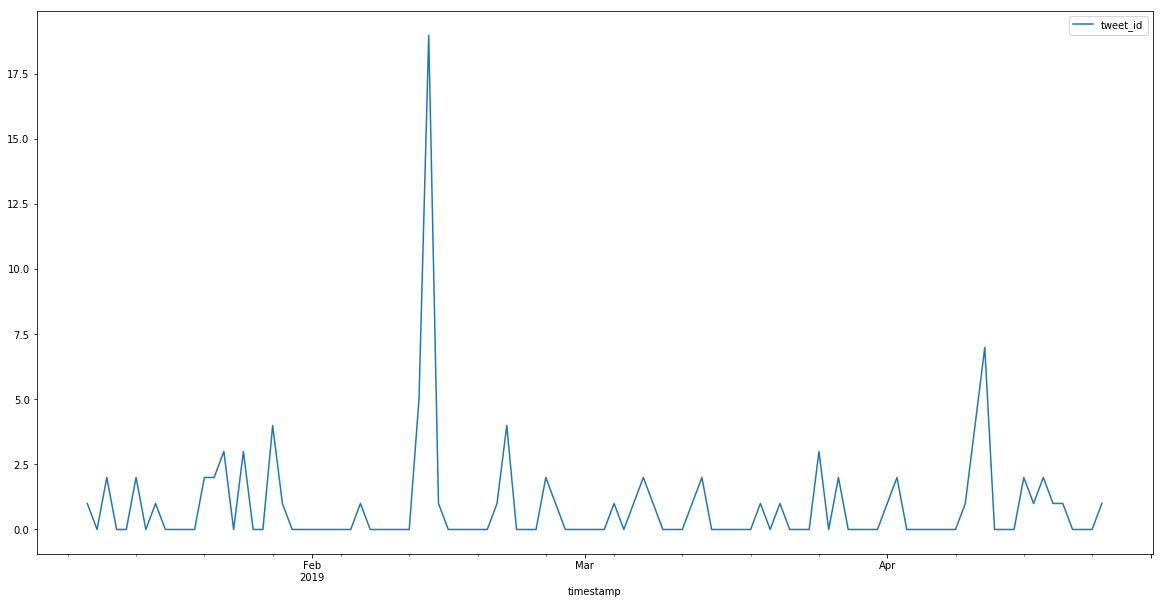

In [68]:
CityTweetsOverTime.resample('D').sum().plot(figsize=(20,10))

## Totals by month

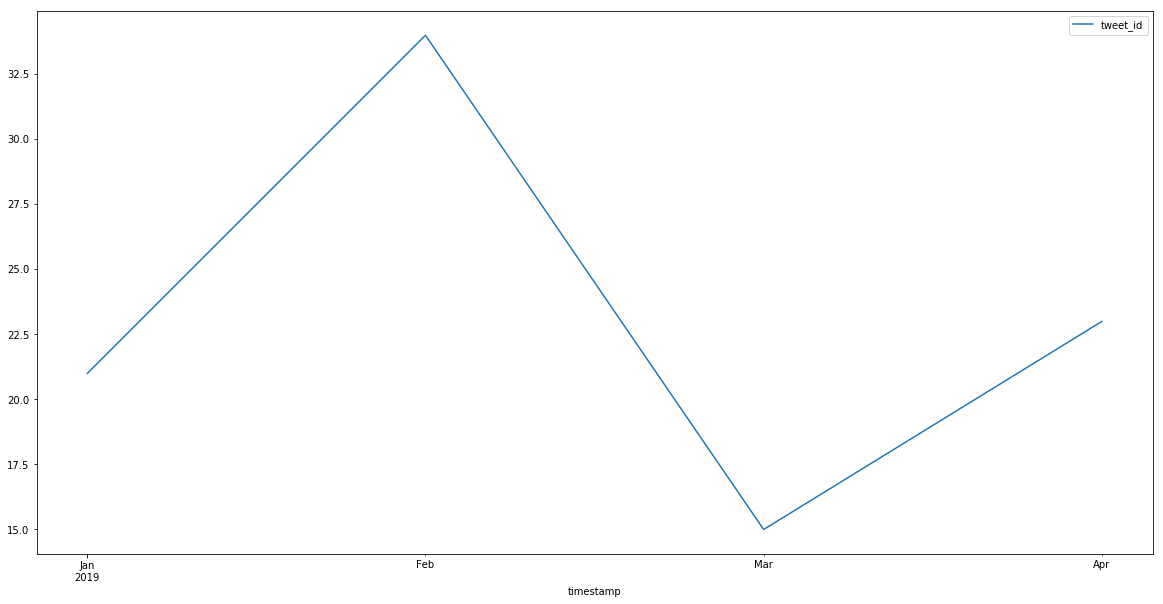

In [69]:

CityTweetsOverTime.resample('M').sum().plot(figsize=(20,10))

## TWEETS BY DAY OF WEEK, 0 IS MONDAY 6 IS SUNDAY



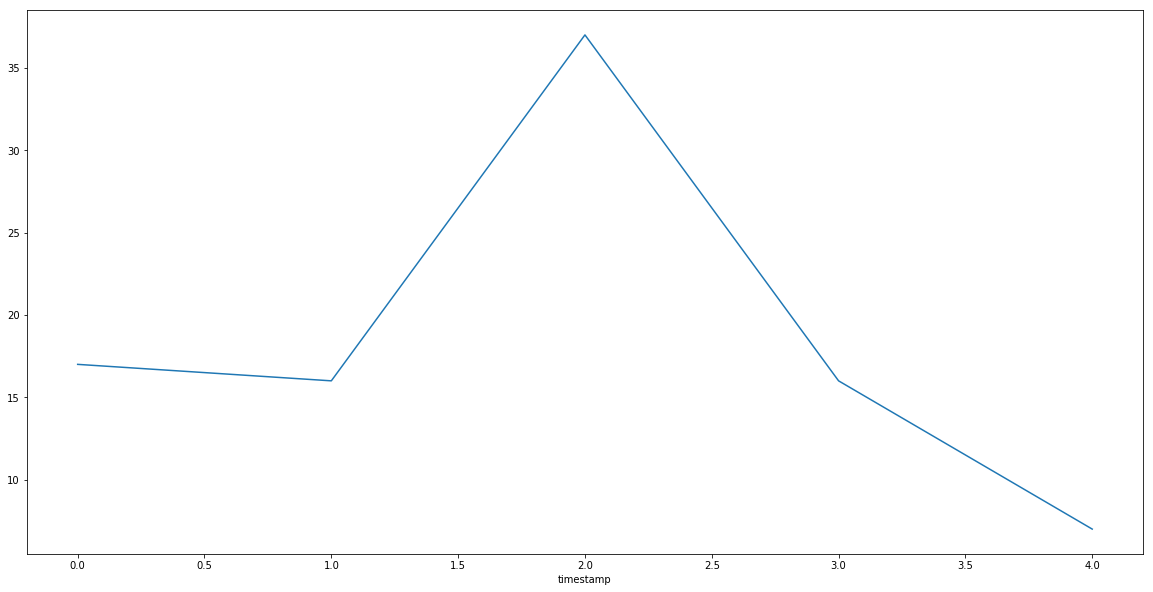

In [29]:
#Return the day of the week as an integer, where Monday is 0 and Sunday is 6.
CityTweetsOverTime.groupby(CityTweetsOverTime.index.dayofweek)['tweet_id'].sum().plot(figsize=(20,10))

## CITY YEAR TWEETS BY HOUR OF THE DAY - 24 HOUR CLOCK 

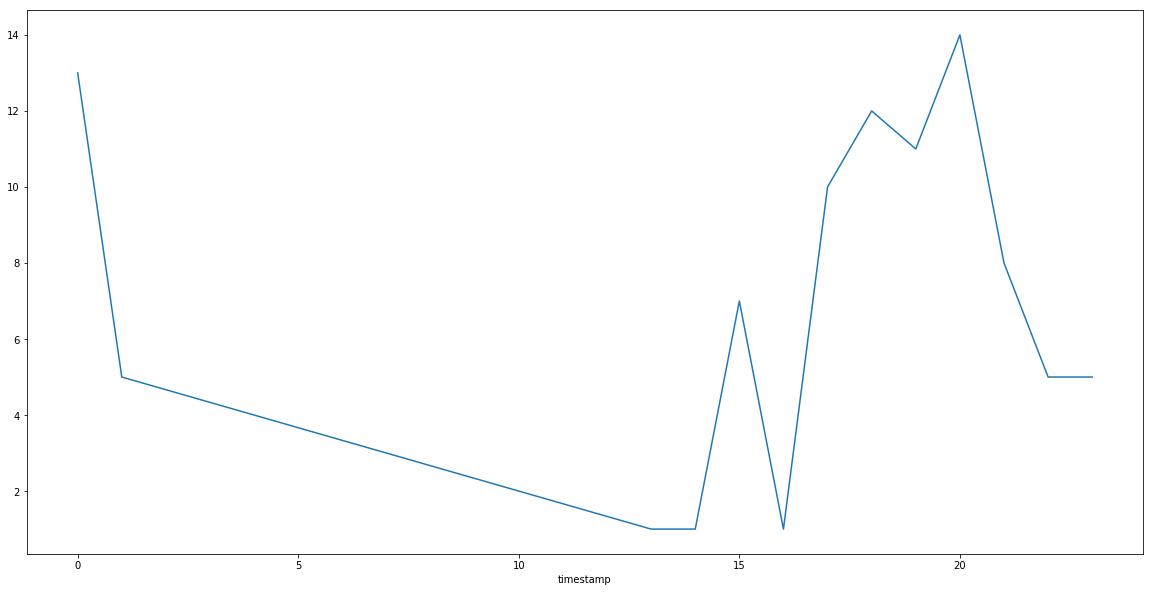

In [30]:
CityTweetsOverTime.groupby(CityTweetsOverTime.index.hour)['tweet_id'].sum().plot(figsize=(20,10))

## grab tweets with more than 5 retweets
only 9

In [31]:
time_retweet = time[time["retweet_count"] > 5] 


In [72]:
time_retweet

,tweet_id,created_at_text,retweet_count,favorite_count
timestamp,,,,
2019-04-10 19:37:10,1.120000e+18,Wed Apr 10 19:37:10 +0000 2019,6,18
2019-03-13 18:55:23,1.110000e+18,Wed Mar 13 18:55:23 +0000 2019,15,26
2019-03-13 17:50:49,1.110000e+18,Wed Mar 13 17:50:49 +0000 2019,39,46
2019-02-21 18:45:00,1.100000e+18,Thu Feb 21 18:45:00 +0000 2019,8,24
2019-02-13 00:39:37,1.100000e+18,Wed Feb 13 00:39:37 +0000 2019,7,43
2019-01-23 22:58:09,1.090000e+18,Wed Jan 23 22:58:09 +0000 2019,8,23
2019-01-22 20:16:53,1.090000e+18,Tue Jan 22 20:16:53 +0000 2019,20,49
2019-01-21 17:44:01,1.090000e+18,Mon Jan 21 17:44:01 +0000 2019,6,14
2019-01-16 22:03:06,1.090000e+18,Wed Jan 16 22:03:06 +0000 2019,12,22


## top retweets by time of day
may need a larger sample size here and below....

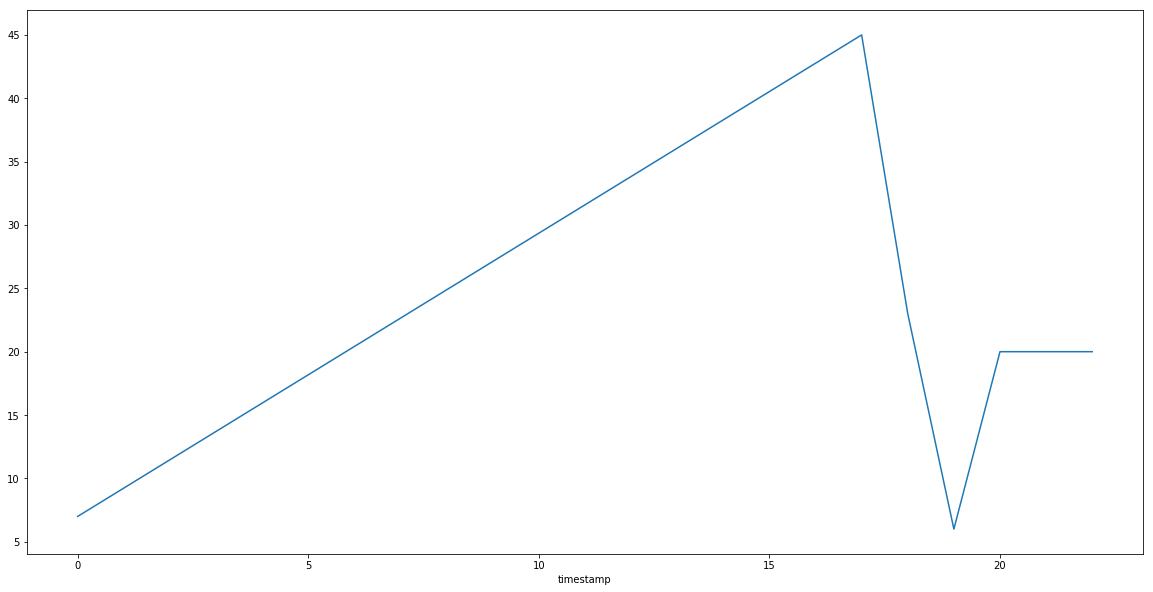

In [32]:
time_retweet.groupby(time_retweet.index.hour)['retweet_count'].sum().plot(figsize=(20,10))

## top retweets by day of month

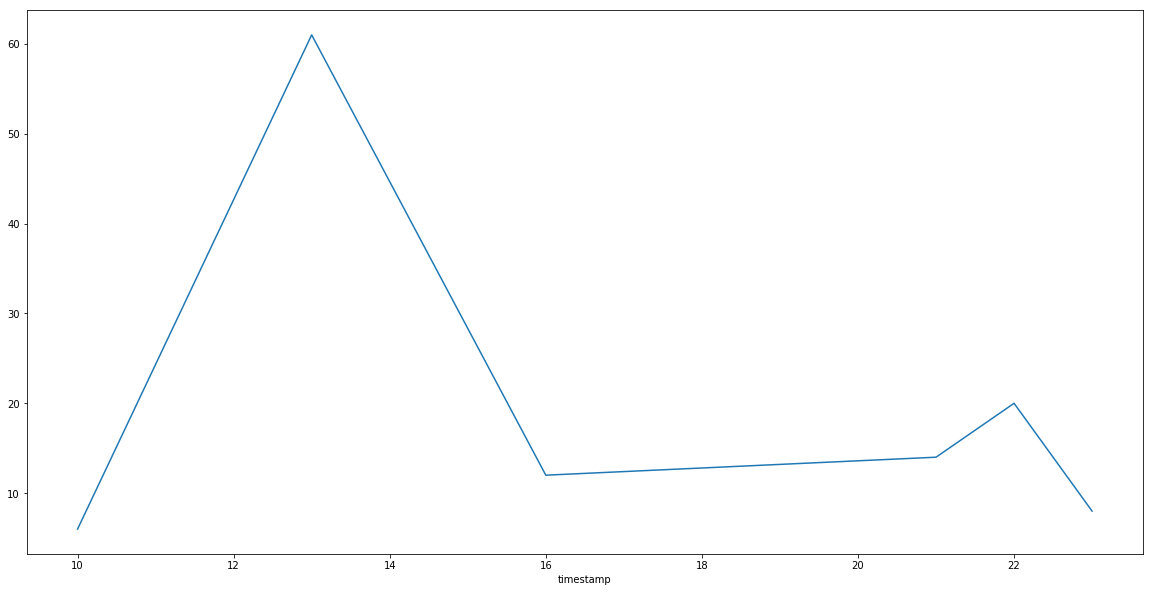

In [33]:
time_retweet.groupby(time_retweet.index.day)['retweet_count'].sum().plot(figsize=(20,10))

## grab favorites 

In [34]:
time_favorite = time[time["favorite_count"] > 20] 

In [71]:
time_favorite

,tweet_id,created_at_text,retweet_count,favorite_count
timestamp,,,,
2019-03-13 18:55:23,1.110000e+18,Wed Mar 13 18:55:23 +0000 2019,15,26
2019-03-13 17:50:49,1.110000e+18,Wed Mar 13 17:50:49 +0000 2019,39,46
2019-02-21 18:45:00,1.100000e+18,Thu Feb 21 18:45:00 +0000 2019,8,24
2019-02-13 00:39:37,1.100000e+18,Wed Feb 13 00:39:37 +0000 2019,7,43
2019-02-12 23:46:16,1.100000e+18,Tue Feb 12 23:46:16 +0000 2019,4,21
2019-02-12 22:30:20,1.100000e+18,Tue Feb 12 22:30:20 +0000 2019,5,23
2019-01-25 15:10:43,1.090000e+18,Fri Jan 25 15:10:43 +0000 2019,5,40
2019-01-23 22:58:09,1.090000e+18,Wed Jan 23 22:58:09 +0000 2019,8,23
2019-01-22 20:16:53,1.090000e+18,Tue Jan 22 20:16:53 +0000 2019,20,49


## favorites by time of day

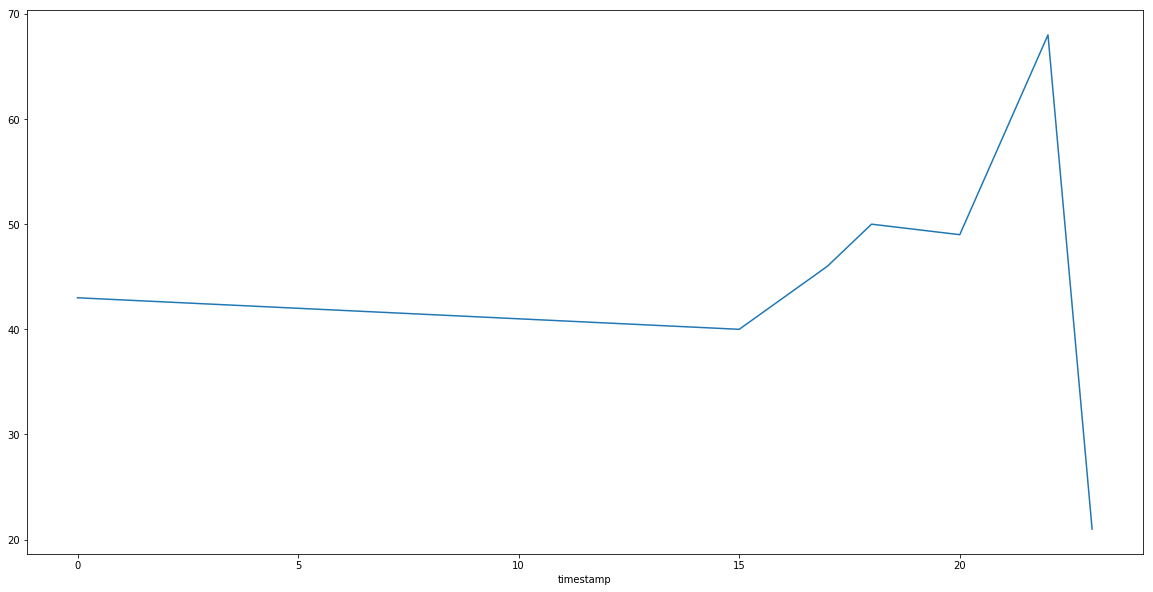

In [36]:
time_favorite.groupby(time_favorite.index.hour)['favorite_count'].sum().plot(figsize=(20,10))

## favorites by day of month

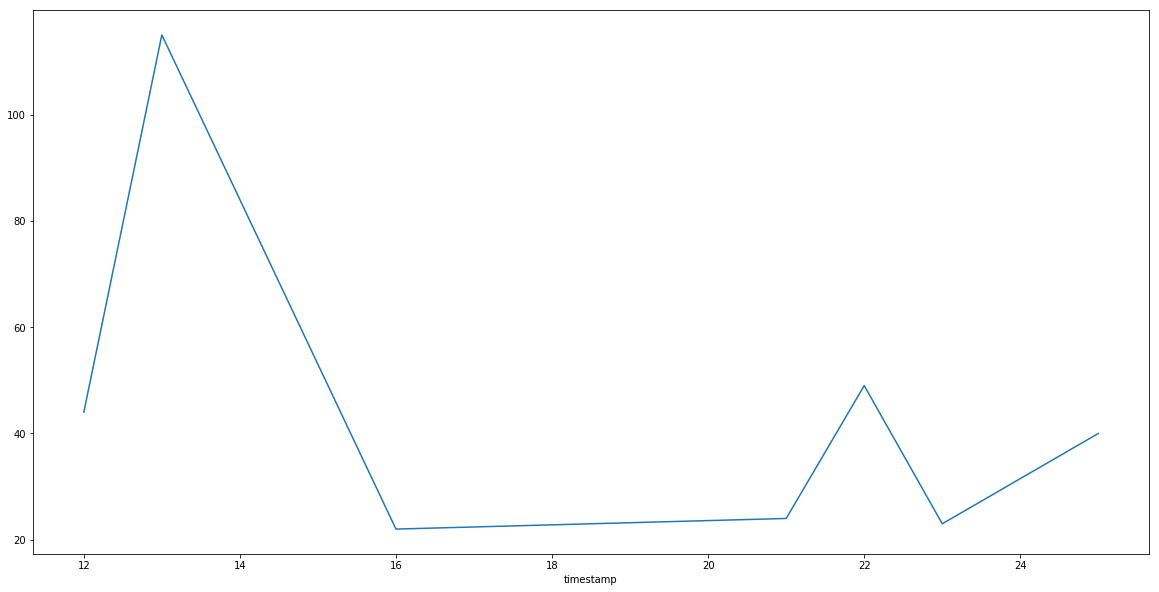

In [37]:
time_favorite.groupby(time_favorite.index.day)['favorite_count'].sum().plot(figsize=(20,10))

## favorites by month

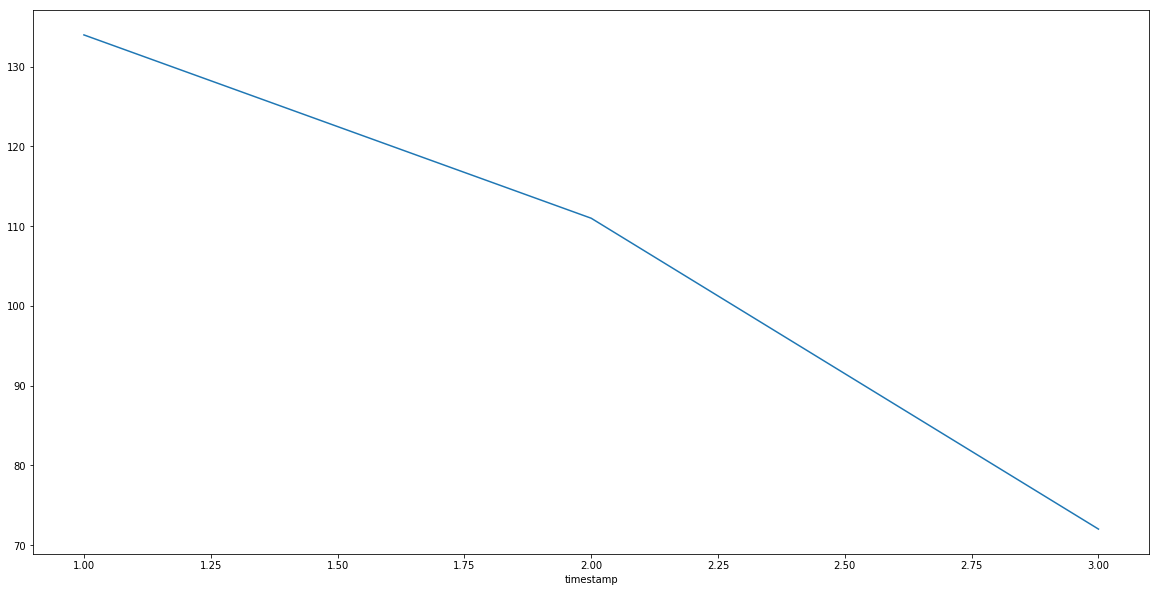

In [38]:
time_favorite.groupby(time_favorite.index.month)['favorite_count'].sum().plot(figsize=(20,10))

## ALL TWEETS BY MONTH from jan through april

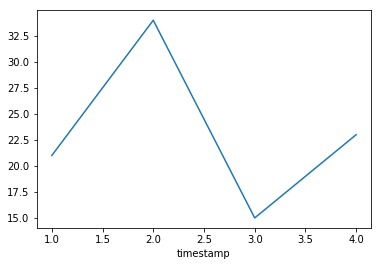

In [39]:
CityTweetsOverTime.groupby(CityTweetsOverTime.index.month)['tweet_id'].sum().plot()